<a href="https://colab.research.google.com/github/mohammedterry/NLP_for_ML/blob/master/NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
example_document = '''
Friday 9/11/2018
9th November 2018

Hey ho !
Can i have your contact details, please? 
aaha aaahhhh ah ahah ahahah ahh ahhahahaha hahaha hahahah
Sure. 
My email is mohammed@cognitionx.io and my phone number is 0743423453 0 01 012 1987 98 0.32 2.34 

The Matrix is a 1999 science fiction action film written and directed by The Wachowskis, starring Keanu Reeves, Laurence Fishburne, Carrie-Anne Moss, Hugo Weaving, and Joe Pantoliano.
'''

# Stanford Core NLP

In [0]:
!pip3 install nltk==3.2.4

In [0]:
!wget http://nlp.stanford.edu/software/stanford-ner-2015-04-20.zip
!unzip stanford-ner-2015-04-20.zip 

--2019-03-05 18:41:21--  http://nlp.stanford.edu/software/stanford-ner-2015-04-20.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/software/stanford-ner-2015-04-20.zip [following]
--2019-03-05 18:41:21--  https://nlp.stanford.edu/software/stanford-ner-2015-04-20.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 176961718 (169M) [application/zip]
Saving to: ‘stanford-ner-2015-04-20.zip.2’

stanford-ner-2015-0 100%[===================>] 168.76M  12.3MB/s    in 9.3s    

2019-03-05 18:41:31 (18.1 MB/s) - ‘stanford-ner-2015-04-20.zip.2’ saved [176961718/176961718]

Archive:  stanford-ner-2015-04-20.zip
replace stanford-ner-2015-04-20/README.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
repl

In [215]:
from nltk.tag.stanford import StanfordNERTagger
jar = "stanford-ner-2015-04-20/stanford-ner-3.5.2.jar"
model = "stanford-ner-2015-04-20/classifiers/" 
st_3class = StanfordNERTagger(model + "english.all.3class.distsim.crf.ser.gz", jar, encoding='utf8') 
st_4class = StanfordNERTagger(model + "english.conll.4class.distsim.crf.ser.gz", jar, encoding='utf8') 
st_7class = StanfordNERTagger(model + "english.muc.7class.distsim.crf.ser.gz", jar, encoding='utf8') 

/usr/local/lib/python3.6/dist-packages/nltk/tag/stanford.py:183: DeprecationWarning: 
The StanfordTokenizer will be deprecated in version 3.2.5.
Please use nltk.tag.corenlp.CoreNLPPOSTagger or nltk.tag.corenlp.CoreNLPNERTagger instead.
  '-tokenizerFactory',
/usr/local/lib/python3.6/dist-packages/nltk/tag/stanford.py:183: DeprecationWarning: 
The StanfordTokenizer will be deprecated in version 3.2.5.
Please use nltk.tag.corenlp.CoreNLPPOSTagger or nltk.tag.corenlp.CoreNLPNERTagger instead.
  '-tokenizerFactory',
/usr/local/lib/python3.6/dist-packages/nltk/tag/stanford.py:183: DeprecationWarning: 
The StanfordTokenizer will be deprecated in version 3.2.5.
Please use nltk.tag.corenlp.CoreNLPPOSTagger or nltk.tag.corenlp.CoreNLPNERTagger instead.
  '-tokenizerFactory',


In [0]:
def stanford_ner(document,model):
  if model == 1:
    return [(entity,tag) for entity,tag in st_3class.tag(document.split()) if tag != "O"]
  elif model == 2:
    return [(entity,tag) for entity,tag in st_4class.tag(document.split()) if tag != "O"]
  elif model == 3:
    return [(entity,tag) for entity,tag in st_7class.tag(document.split()) if tag != "O"]

In [224]:
stanford_ner(example_document,model=1)

[('Keanu', 'PERSON'),
 ('Reeves,', 'PERSON'),
 ('Laurence', 'PERSON'),
 ('Fishburne,', 'PERSON'),
 ('Carrie-Anne', 'PERSON'),
 ('Joe', 'PERSON'),
 ('Pantoliano.', 'PERSON')]

In [225]:
stanford_ner(example_document,model=2)

[('Matrix', 'PERSON'),
 ('Keanu', 'PERSON'),
 ('Reeves,', 'PERSON'),
 ('Laurence', 'PERSON'),
 ('Fishburne,', 'PERSON'),
 ('Carrie-Anne', 'PERSON'),
 ('Moss,', 'PERSON'),
 ('Hugo', 'PERSON'),
 ('Weaving,', 'PERSON'),
 ('Joe', 'PERSON'),
 ('Pantoliano.', 'PERSON')]

In [226]:
stanford_ner(example_document,model=3)

[('Friday', 'DATE'),
 ('9112018', 'DATE'),
 ('9th', 'DATE'),
 ('November', 'DATE'),
 ('2018', 'DATE'),
 ('1987', 'DATE'),
 ('1999', 'DATE'),
 ('Keanu', 'PERSON'),
 ('Reeves,', 'PERSON'),
 ('Laurence', 'PERSON'),
 ('Fishburne,', 'PERSON'),
 ('Carrie-Anne', 'PERSON'),
 ('Moss,', 'PERSON'),
 ('Joe', 'PERSON'),
 ('Pantoliano.', 'PERSON')]

# NLTK

In [0]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [0]:
def nltk_ner(document):
  return {(' '.join(c[0] for c in chunk), chunk.label() ) for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(document))) if hasattr(chunk, 'label') }

In [0]:
nltk_ner(example_document)

{('Hugo Weaving', 'PERSON'),
 ('Joe Pantoliano', 'PERSON'),
 ('Keanu Reeves', 'PERSON'),
 ('Laurence Fishburne', 'PERSON'),
 ('Matrix', 'ORGANIZATION'),
 ('Wachowskis', 'ORGANIZATION')}

# Spacy

In [0]:
!python3 -m spacy download en_core_web_lg
import spacy
sp = spacy.load('en_core_web_lg') 

    100% |████████████████████████████████| 852.3MB 57.6MB/s 
  Running setup.py install for en-core-web-lg ... done

    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_lg -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en_core_web_lg

    You can now load the model via spacy.load('en_core_web_lg')



In [0]:
def spacy_ner(document):
  return {(ent.text.strip(), ent.label_) for ent in sp(document).ents}

In [0]:
spacy_ner(example_document)

{('', 'PERSON'),
 ('1987', 'DATE'),
 ('1999', 'DATE'),
 ('2.34', 'TIME'),
 ('98 0.32', 'QUANTITY'),
 ('Carrie-Anne Moss', 'PERSON'),
 ('Friday 9/11/2018', 'DATE'),
 ('Hugo Weaving', 'ORG'),
 ('Joe Pantoliano', 'PERSON'),
 ('Keanu Reeves', 'PERSON'),
 ('Laurence Fishburne', 'PERSON'),
 ('Matrix', 'ORG'),
 ('November 2018', 'DATE'),
 ('Wachowskis', 'PERSON'),
 ('mohammed@cognitionx.io', 'PERSON')}

# Allen NLP

In [0]:
!pip3 install allennlp
from allennlp.predictors import Predictor
al = Predictor.from_path("https://s3-us-west-2.amazonaws.com/allennlp/models/fine-grained-ner-model-elmo-2018.12.21.tar.gz")

    100% |████████████████████████████████| 5.6MB 5.0MB/s 
    100% |████████████████████████████████| 552kB 26.0MB/s 
    100% |████████████████████████████████| 51kB 21.2MB/s 
    100% |████████████████████████████████| 122kB 31.6MB/s 
    100% |████████████████████████████████| 133kB 31.8MB/s 
    100% |████████████████████████████████| 4.5MB 7.8MB/s 
    100% |████████████████████████████████| 51kB 17.2MB/s 
    100% |████████████████████████████████| 512kB 959kB/s 
    100% |████████████████████████████████| 12.6MB 2.5MB/s 
    100% |████████████████████████████████| 1.5MB 18.1MB/s 
    100% |████████████████████████████████| 143kB 32.2MB/s 
    100% |████████████████████████████████| 61kB 21.9MB/s 
    100% |████████████████████████████████| 51kB 20.5MB/s 
    100% |████████████████████████████████| 2.3MB 13.2MB/s 
    100% |████████████████████████████████| 51kB 21.1MB/s 
    100% |████████████████████████████████| 204kB 23.9MB/s 
    100% |████████████████████████████████| 7.5M

Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


100%|██████████| 724601837/724601837 [00:13<00:00, 51888450.01B/s]
/usr/local/lib/python3.6/dist-packages/allennlp/data/token_indexers/token_characters_indexer.py:51: UserWarning: You are using the default value (0) of `min_padding_length`, which can cause some subtle bugs (more info see https://github.com/allenai/allennlp/issues/1954). Strongly recommend to set a value, usually the maximum size of the convolutional layer size when using CnnEncoder.
  UserWarning)


In [0]:
def convert_results(allen_results):
  ents = set()
  for word, tag in zip(allen_results["words"], allen_results["tags"]):
    if tag != "O":
      ent_position, ent_type = tag.split("-")
      if ent_position == "U":
        ents.add((word,ent_type))
      else:
        if ent_position == "B":
          w = word
        elif ent_position == "I":
          w += " " + word
        elif ent_position == "L":
          w += " " + word
          ents.add((w,ent_type))
  return ents

def allennlp_ner(document):
  return convert_results(al.predict(sentence=document))

In [0]:
allennlp_ner(example_document)

{('0.32 2.34', 'CARDINAL'),
 ('1987', 'DATE'),
 ('1999', 'DATE'),
 ('Carrie - Anne Moss', 'PERSON'),
 ('Friday 9/11/2018 9th November 2018', 'DATE'),
 ('Hugo Weaving', 'PERSON'),
 ('Joe Pantoliano', 'PERSON'),
 ('Keanu Reeves', 'PERSON'),
 ('Laurence Fishburne', 'PERSON'),
 ('The Matrix', 'WORK_OF_ART'),
 ('The Wachowskis', 'PERSON')}

# Polyglot

In [0]:
!pip3 install -U git+https://github.com/aboSamoor/polyglot.git@master
!polyglot download embeddings2.en ner2.en
from polyglot.text import Text

  Cloning https://github.com/aboSamoor/polyglot.git (to revision master) to /tmp/pip-req-build-ic84qxrt
    100% |████████████████████████████████| 14.3MB 2.4MB/s 
    100% |████████████████████████████████| 215kB 25.2MB/s 
  Stored in directory: /tmp/pip-ephem-wheel-cache-7mqzlz5r/wheels/42/d9/73/345c7ae8554299ff8b31635d64eb8455fd591385fa734cdbef
  Stored in directory: /root/.cache/pip/wheels/7b/44/44/ec4c5e25e095f02aa0e63ef2bf0cc8badda5877330ffa5fbe4
  Stored in directory: /root/.cache/pip/wheels/ed/73/e3/0621953e0e442f0333daa1dd6523bec36606ee33f75612923a
  Stored in directory: /root/.cache/pip/wheels/43/74/e2/92a807d8662f5a0df908ba20887f8ad02bf1b130d3939b65b7
  Stored in directory: /root/.cache/pip/wheels/f3/f9/c7/4fbf1faa6038faf183f6e3ea61f17a5f7eea5ab9a1dd7753fd
Successfully built polyglot pycld2 PyICU morfessor futures


In [0]:
def polyglot_ner(document):
  return {(' '.join(entity),entity.tag.split('-')[-1]) for entity in Text(document).entities}

In [0]:
polyglot_ner(example_document)

{('Anne Moss', 'PER'),
 ('Carrie', 'PER'),
 ('Hugo Weaving', 'PER'),
 ('Joe Pantoliano', 'PER'),
 ('Keanu Reeves', 'PER'),
 ('Laurence Fishburne', 'PER'),
 ('cognitionx.io', 'PER'),
 ('mohammed', 'PER')}

# Which is the Best?

In [0]:
test = {
  "text":'''Elizabeth was born in London as the first child of the Duke and Duchess of York, later King George VI and Queen Elizabeth, and she was educated privately at home. Her father acceded to the throne on the abdication of his brother King Edward VIII in 1936''',
  "entities" : {
    "dates":{"1936"},
    "locations":{"London", "York"},
    "people":{
        "Elizabeth",
        "Duke",
        "Duchess",
        "King George VI",
        "Queen Elizabeth",
        "King Edward VIII",
    },
  }
}

## Which is the quickest?

In [230]:
import time

nltk_start = time.time()
Y_nltk = nltk_ner(test["text"])
nltk_end = time.time()
nltk_time = nltk_end - nltk_start
print(f"NLTK = {nltk_time}s")

stanford_start = time.time()
Y_stanford1 = stanford_ner(test["text"],model=1)
stanford_end = time.time()
stanford_time1 = stanford_end - stanford_start
print(f"Stanford Core NLP (3 class) = {stanford_time1}s")

stanford_start = time.time()
Y_stanford2 = stanford_ner(test["text"],model=2)
stanford_end = time.time()
stanford_time2 = stanford_end - stanford_start
print(f"Stanford Core NLP (4 class) = {stanford_time2}s")

stanford_start = time.time()
Y_stanford3 = stanford_ner(test["text"],model=3)
stanford_end = time.time()
stanford_time3 = stanford_end - stanford_start
print(f"Stanford Core NLP (7 class) = {stanford_time3}s")

spacy_start = time.time()
Y_spacy = spacy_ner(test["text"])
spacy_end = time.time()
spacy_time = spacy_end - spacy_start
print(f"Spacy = {spacy_time}s")

allen_start = time.time()
Y_allen = allennlp_ner(test["text"])
allen_end = time.time()
allen_time = allen_end - allen_start
print(f"Allen NLP = {allen_time}s")

poly_start = time.time()
Y_polyglot = polyglot_ner(test["text"])
poly_end = time.time()
poly_time = poly_end - poly_start
print(f"Polyglot = {poly_time}s")

NLTK = 0.027831077575683594s
Stanford Core NLP (3 class) = 3.4689226150512695s
Stanford Core NLP (4 class) = 4.3765435218811035s
Stanford Core NLP (7 class) = 2.9917149543762207s
Spacy = 0.45018982887268066s
Allen NLP = 2.41034197807312s
Polyglot = 0.007372617721557617s


Text(0.5, 1.0, 'How long does each NER take?')

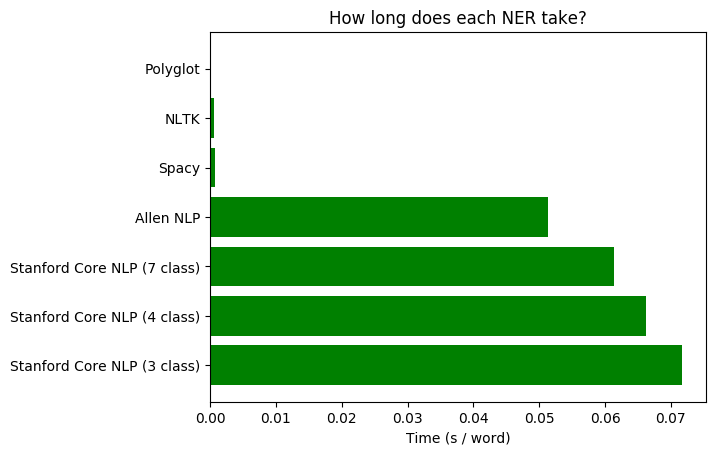

In [229]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()

n_words = len(X.split())
ners = ('Polyglot', 'NLTK', 'Spacy',  'Allen NLP', 'Stanford Core NLP (7 class)', 'Stanford Core NLP (4 class)', 'Stanford Core NLP (3 class)')
performance = [poly_time/n_words, nltk_time/n_words, spacy_time/n_words, allen_time/n_words, stanford_time3/n_words, stanford_time2/n_words, stanford_time1/n_words]
y_pos = np.arange(len(ners))

ax.barh(y_pos, performance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(ners)
ax.invert_yaxis()  
ax.set_xlabel('Time (s / word)')
ax.set_title('How long does each NER take?')

## Which is the best NER for finding entities?

In [0]:
def f1_score(Y, Y_hat, strict=False):
  e = .000001
  non_entities = {}
  true_positives = sum([max([1 if y == y_hat else .5 if y_hat in y else .5 if y in y_hat else 0 for y_hat in Y_hat]+ [0]) for y in Y]) # correctly identified
  if strict: true_positives = len(Y.intersection(Y_hat)) #if strict, only count exact entity matches and not partial matches (default)
  dY = Y ^ Y_hat 
  false_positives = len(Y_hat.intersection(dY)) # incorrectly identified
  false_negatives = len(Y) - true_positives # incorrectly rejected
  recall = true_positives / (true_positives + false_negatives + e)
  precision = true_positives / (true_positives + false_positives + e)
  return (2 * precision * recall) / (precision + recall + e)

In [236]:
expected_entities = {entity for entities in test["entities"].values() for entity in entities}
polyglot_entities = {entity for entity,_ in Y_polyglot}
spacy_entities = {entity for entity,_ in Y_spacy}
nltk_entities = {entity for entity,_ in Y_nltk}
stanford_entities1 = {entity for entity,_ in Y_stanford1}
stanford_entities2 = {entity for entity,_ in Y_stanford2}
stanford_entities3 = {entity for entity,_ in Y_stanford3}
allen_entities = {entity for entity,_ in Y_allen}

print(f"Expected = 100.0%\n\t{sorted(expected_entities)}\n")
f1_poly = f1_score(expected_entities, polyglot_entities)
print(f"Polyglot = {f1_poly*100}%\n\t{sorted(polyglot_entities)}\n")
f1_spacy = f1_score(expected_entities, spacy_entities)
print(f"Spacy = {f1_spacy*100}%\n\t{sorted(spacy_entities)}\n")
f1_nltk = f1_score(expected_entities, nltk_entities)
print(f"NLTK = {f1_nltk*100}%\n\t{sorted(nltk_entities)}\n")
f1_stanford1 = f1_score(expected_entities, stanford_entities1)
print(f"Stanford Core NLP (3 class) = {f1_stanford1*100}%\n\t{sorted(stanford_entities1)}\n")
f1_stanford2 = f1_score(expected_entities, stanford_entities2)
print(f"Stanford Core NLP (4 class) = {f1_stanford2*100}%\n\t{sorted(stanford_entities2)}\n")
f1_stanford3 = f1_score(expected_entities, stanford_entities3)
print(f"Stanford Core NLP (7 class) = {f1_stanford3*100}%\n\t{sorted(stanford_entities3)}\n")
f1_allen = f1_score(expected_entities, allen_entities)
print(f"Allen NLP = {f1_allen*100}%\n\t{sorted(allen_entities)}\n")

Expected = 100.0%
	['1936', 'Duchess', 'Duke', 'Elizabeth', 'King Edward VIII', 'King George VI', 'London', 'Queen Elizabeth', 'York']

Polyglot = 94.1175861591972%
	['Duchess', 'Duke', 'Elizabeth', 'King Edward VIII', 'King George VI', 'London', 'Queen Elizabeth', 'York']

Spacy = 66.6666089991195%
	['1936', 'Elizabeth', 'George VI', 'King Edward VIII', 'London', 'Queen Elizabeth', 'first']

NLTK = 66.66660925929759%
	['Duchess of York', 'Duke', 'Edward VIII', 'Elizabeth', 'George VI', 'London', 'Queen Elizabeth']

Stanford Core NLP (3 class) = 43.902385484886%
	['Duke', 'Edward', 'Elizabeth', 'Elizabeth,', 'George', 'King', 'London', 'Queen', 'VI', 'VIII']

Stanford Core NLP (4 class) = 54.54540123971243%
	['Duchess', 'Duke', 'Edward', 'Elizabeth', 'George', 'King', 'London', 'VI', 'VIII', 'York,', 'of']

Stanford Core NLP (7 class) = 44.44438950622964%
	['1936', 'Duke', 'Edward', 'George', 'King', 'London', 'VI', 'VIII']

Allen NLP = 59.45940306797547%
	['1936', 'Duchess of York', '

Text(0.5, 1.0, 'How good is each NER at detecting entities?')

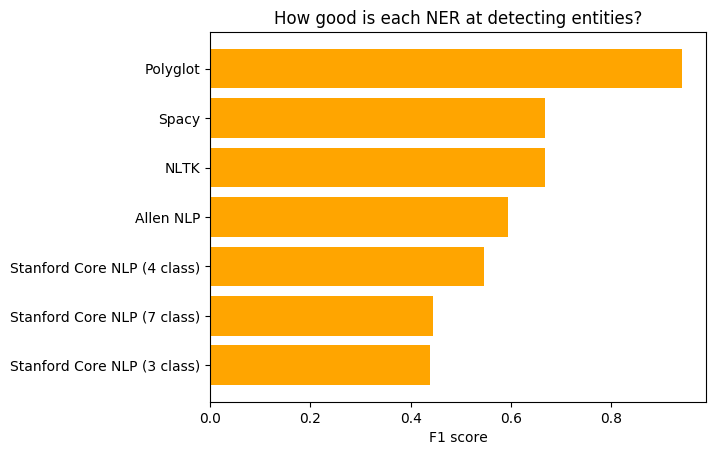

In [237]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()

n_words = len(X.split())
ners = ('Polyglot', 'Spacy', 'NLTK', 'Allen NLP', 'Stanford Core NLP (4 class)', 'Stanford Core NLP (7 class)', 'Stanford Core NLP (3 class)')
performance = [f1_poly, f1_spacy, f1_nltk, f1_allen, f1_stanford2, f1_stanford3, f1_stanford1]
y_pos = np.arange(len(ners))

ax.barh(y_pos, performance, align='center', color='orange', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(ners)
ax.invert_yaxis()  
ax.set_xlabel('F1 score')
ax.set_title('How good is each NER at detecting entities?')

## Which is the best NER for correctly labelling entities?

In [238]:
polyglot_people = {entity for entity,tag in Y_polyglot if tag == "PER"}
spacy_people = {entity for entity,tag in Y_spacy if tag == "PERSON"}
nltk_people = {entity for entity,tag in Y_nltk if tag == "PERSON"}
stanford_people1 = {entity for entity,tag in Y_stanford1 if tag == "PERSON"}
stanford_people2 = {entity for entity,tag in Y_stanford2 if tag == "PERSON"}
stanford_people3 = {entity for entity,tag in Y_stanford3 if tag == "PERSON"}
allen_people = {entity for entity,tag in Y_allen if tag == "PERSON"}

polyglot_dates = {entity for entity,tag in Y_polyglot if tag == "DATE"}
spacy_dates = {entity for entity,tag in Y_spacy if tag == "DATE"}
nltk_dates = {entity for entity,tag in Y_nltk if tag == "DATE"}
stanford_dates1 = {entity for entity,tag in Y_stanford1 if tag == "DATE"}
stanford_dates2 = {entity for entity,tag in Y_stanford2 if tag == "DATE"}
stanford_dates3 = {entity for entity,tag in Y_stanford3 if tag == "DATE"}
allen_dates = {entity for entity,tag in Y_allen if tag == "DATE"}

polyglot_locations = {entity for entity,tag in Y_polyglot if tag == "LOC"}
spacy_locations = {entity for entity,tag in Y_spacy if tag == "GPE"}
nltk_locations = {entity for entity,tag in Y_nltk if tag == "GPE"}
stanford_locations1 = {entity for entity,tag in Y_stanford1 if tag == "LOCATION"}
stanford_locations2 = {entity for entity,tag in Y_stanford2 if tag == "LOCATION"}
stanford_locations3 = {entity for entity,tag in Y_stanford3 if tag == "LOCATION"}
allen_locations = {entity for entity,tag in Y_allen if tag == "GPE"}

f1_poly_ppl = f1_score(test["entities"]["people"], polyglot_people)
f1_poly_dts = f1_score(test["entities"]["dates"], polyglot_dates)
f1_poly_loc = f1_score(test["entities"]["locations"], polyglot_locations)
print(f"Polyglot \n\tPeople =\t{f1_poly_ppl*100}%\t{polyglot_people}\n\tLocations =\t{f1_poly_loc*100}%\t{polyglot_locations}\n\tDates =\t\t{f1_poly_dts*100}%\t{polyglot_dates}\n\n")
f1_spacy_ppl = f1_score(test["entities"]["people"], spacy_people)
f1_spacy_dts = f1_score(test["entities"]["dates"], spacy_dates)
f1_spacy_loc = f1_score(test["entities"]["locations"], spacy_locations)
print(f"Spacy \n\tPeople =\t{f1_spacy_ppl*100}%\t{spacy_people}\n\tLocations =\t{f1_spacy_loc*100}%\t{spacy_locations}\n\tDates =\t\t{f1_spacy_dts*100}%\t{spacy_dates}\n\n")
f1_nltk_ppl = f1_score(test["entities"]["people"], nltk_people)
f1_nltk_dts = f1_score(test["entities"]["dates"], nltk_dates)
f1_nltk_loc = f1_score(test["entities"]["locations"], nltk_locations)
print(f"NLTK \n\tPeople =\t{f1_nltk_ppl*100}%\t{nltk_people}\n\tLocations =\t{f1_nltk_loc*100}%\t{nltk_locations}\n\tDates =\t\t{f1_nltk_dts*100}%\t{nltk_dates}\n\n")
f1_stanford_ppl1 = f1_score(test["entities"]["people"], stanford_people1)
f1_stanford_dts1 = f1_score(test["entities"]["dates"], stanford_dates1)
f1_stanford_loc1 = f1_score(test["entities"]["locations"], stanford_locations1)
print(f"Stanford Core NLP (3 class)\n\tPeople =\t{f1_stanford_ppl1*100}%\t{stanford_people1}\n\tLocations =\t{f1_stanford_loc1*100}%\t{stanford_locations1}\n\tDates =\t\t{f1_stanford_dts1*100}%\t{stanford_dates1}\n\n")
f1_stanford_ppl2 = f1_score(test["entities"]["people"], stanford_people2)
f1_stanford_dts2 = f1_score(test["entities"]["dates"], stanford_dates2)
f1_stanford_loc2 = f1_score(test["entities"]["locations"], stanford_locations2)
print(f"Stanford Core NLP (4 class)\n\tPeople =\t{f1_stanford_ppl2*100}%\t{stanford_people2}\n\tLocations =\t{f1_stanford_loc2*100}%\t{stanford_locations2}\n\tDates =\t\t{f1_stanford_dts2*100}%\t{stanford_dates2}\n\n")
f1_stanford_ppl3 = f1_score(test["entities"]["people"], stanford_people3)
f1_stanford_dts3 = f1_score(test["entities"]["dates"], stanford_dates3)
f1_stanford_loc3 = f1_score(test["entities"]["locations"], stanford_locations3)
print(f"Stanford Core NLP (7 class)\n\tPeople =\t{f1_stanford_ppl3*100}%\t{stanford_people3}\n\tLocations =\t{f1_stanford_loc3*100}%\t{stanford_locations3}\n\tDates =\t\t{f1_stanford_dts3*100}%\t{stanford_dates3}\n\n")
f1_allen_ppl = f1_score(test["entities"]["people"], allen_people)
f1_allen_dts = f1_score(test["entities"]["dates"], allen_dates)
f1_allen_loc = f1_score(test["entities"]["locations"], allen_locations)
print(f"Allen NLP \n\tPeople =\t{f1_allen_ppl*100}%\t{allen_people}\n\tLocations =\t{f1_allen_loc*100}%\t{allen_locations}\n\tDates =\t\t{f1_allen_dts*100}%\t{allen_dates}\n\n")

Polyglot 
	People =	92.30762840239572%	{'King George VI', 'York', 'Elizabeth', 'Queen Elizabeth', 'Duchess', 'Duke', 'King Edward VIII'}
	Locations =	66.66657777782964%	{'London'}
	Dates =		0.0%	set()


Spacy 
	People =	66.66660498870016%	{'George VI', 'Elizabeth', 'Queen Elizabeth', 'King Edward VIII'}
	Locations =	66.66657777782964%	{'London'}
	Dates =		99.99985000012501%	{'1936'}


NLTK 
	People =	54.54539504136905%	{'Edward VIII', 'George VI', 'Elizabeth', 'Queen Elizabeth'}
	Locations =	66.66657777782964%	{'London'}
	Dates =		0.0%	set()


Stanford Core NLP (3 class)
	People =	32.25801290329548%	{'George', 'VI', 'Elizabeth', 'VIII', 'Edward', 'Queen', 'Elizabeth,', 'King'}
	Locations =	66.66657777782964%	{'London'}
	Dates =		0.0%	set()


Stanford Core NLP (4 class)
	People =	11.764661591838715%	{'VIII', 'Edward'}
	Locations =	66.66657777782964%	{'London'}
	Dates =		0.0%	set()


Stanford Core NLP (7 class)
	People =	22.222172839593686%	{'George', 'VI'}
	Locations =	66.66657777782964

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


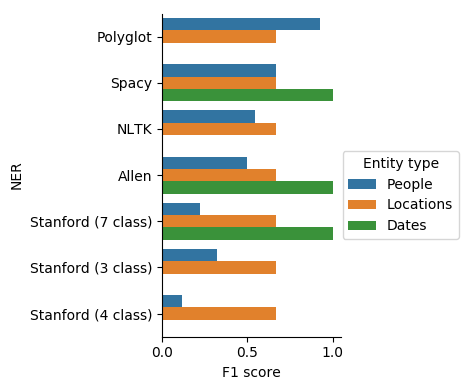

In [241]:
import pandas as pd

df = pd.DataFrame({
    "NER":["Polyglot","Spacy","NLTK","Allen","Stanford (7 class)","Stanford (3 class)","Stanford (4 class)"] *3,
    "Entity type":["People"] *7 + ["Locations"] *7 + ["Dates"]*7,
    "F1 score":[f1_poly_ppl, f1_spacy_ppl, f1_nltk_ppl, f1_allen_ppl,f1_stanford_ppl3,f1_stanford_ppl1,f1_stanford_ppl2, f1_poly_loc, f1_spacy_loc, f1_nltk_loc, f1_allen_loc, f1_stanford_loc3,f1_stanford_loc1,f1_stanford_loc2,  f1_poly_dts, f1_spacy_dts, f1_nltk_dts,  f1_allen_dts, f1_stanford_dts3,f1_stanford_dts1,f1_stanford_dts2],
})


import seaborn as sns
sns.factorplot(x='F1 score',y='NER', hue='Entity type', data=df, kind='bar')